# Analysis

### Observed Trend 1:  
The Sentiment Analysis of Media Tweets shows the volume and the polarity of the last 100 tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**. Running Sentiment Analysis on the tweets shows the overall polarity is mostly positive or neutral.

### Observed Trend 2: 
Looks like tweets from all news agencies have a distribution of positive, negative, and neutral polarity, and there is no trend in time.

### Observed Trend 3: 
The number of the tweets from CBS, Fox and BBC that carry a positive sentiment is significantly higher than that of the rest of the news agencies and on avarage tweets from CNN and New York Times carry a negative sentiment

In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#  API key
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Get all tweets from home feed
target_tags = ["BBC", "CBS", "CNN", "FOX", "NYTimes"]

media = []
dates = []
# Variables for holding sentiments
compound = []
positive = []
negative = []
neutral = []

# Loop through each hashtag
for tag in target_tags:
    
    public_tweets = api.user_timeline(tag, count=100)
    
    for tweet in public_tweets:
  
        results = analyzer.polarity_scores(tweet['text'])
        media.append(tag)
        dates.append(tweet["created_at"])
        compound.append(results["compound"])
        positive.append(results["pos"])
        negative.append(results["neg"])
        neutral.append(results["neu"])

tweet_dict = {
  "Media": media,
  "Compound": compound,
  "Positive": positive,
  "Negative": negative,
  "Neutral": neutral,
  "Tweet_date": dates 
  }

tweet_data = pd.DataFrame(tweet_dict)       
tweet_data

,Compound,Media,Negative,Neutral,Positive,Tweet_date
0,0.5106,BBC,0.000,0.777,0.223,Thu Jun 28 07:01:02 +0000 2018
1,-0.7351,BBC,0.267,0.733,0.000,Wed Jun 27 20:01:05 +0000 2018
2,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 19:02:01 +0000 2018
3,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 18:00:25 +0000 2018
4,-0.4215,BBC,0.259,0.741,0.000,Wed Jun 27 16:04:05 +0000 2018
5,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 15:09:27 +0000 2018
6,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 14:42:13 +0000 2018
7,0.0000,BBC,0.000,1.000,0.000,Wed Jun 27 13:05:07 +0000 2018
8,-0.5106,BBC,0.350,0.650,0.000,Wed Jun 27 11:52:00 +0000 2018
9,0.9403,BBC,0.000,0.536,0.464,Wed Jun 27 11:39:52 +0000 2018


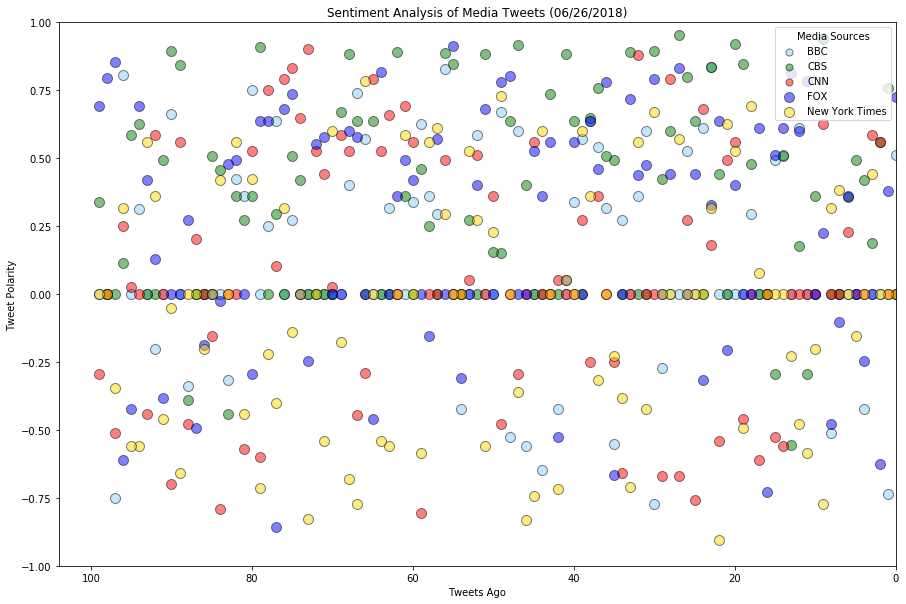

In [3]:
# Defining the X and Y: 
bbc_compound = tweet_data.loc[tweet_data['Media'] == "BBC"]
cbs_compound = tweet_data.loc[tweet_data['Media'] == "CBS"]
cnn_compound = tweet_data.loc[tweet_data['Media'] == "CNN"]
fox_compound = tweet_data.loc[tweet_data['Media'] == "FOX"]
newYorkTimes_compound = tweet_data.loc[tweet_data['Media'] == "NYTimes"]

# Build bubble plots:
plt.figure(figsize= (15,10))
plt.scatter(bbc_compound.index, bbc_compound['Compound'], color="lightskyblue", edgecolor="black"
            , label="BBC", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cbs_compound.index-100, cbs_compound['Compound'], color="Green", edgecolor="black"
            , label="CBS", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(cnn_compound.index-200, cnn_compound['Compound'], color="Red", edgecolor="black"
            , label="CNN", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(fox_compound.index-300, fox_compound['Compound'], color="Blue", edgecolor="black"
            , label="FOX", alpha=0.5, s=round(100, 0), linewidths=1)
plt.scatter(newYorkTimes_compound.index-400, newYorkTimes_compound['Compound'], color="gold", edgecolor="black"
            , label="New York Times", alpha=0.5, s=round(100, 0), linewidths=1)


plt.title("Sentiment Analysis of Media Tweets (06/26/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.xlim ([bbc_compound.index.max()+5, bbc_compound.index.min()])
plt.ylim (-1.0,1.0)

lgnd=plt.legend(loc="upper right", title="Media Sources", scatterpoints=1)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[0]._sizes = [50]

plt.savefig("output_10_1.png")
plt.show()

In [4]:
compound_sum = tweet_data.groupby('Media')['Compound'].sum()
compound_sum.rename(
columns={
    0 : 'Media',
    1 : 'Polarity'
  },
  inplace=True
)
compound_sum

Media
BBC        12.3445
CBS        34.0684
CNN         7.2039
FOX        22.7669
NYTimes    -3.5842
dtype: float64

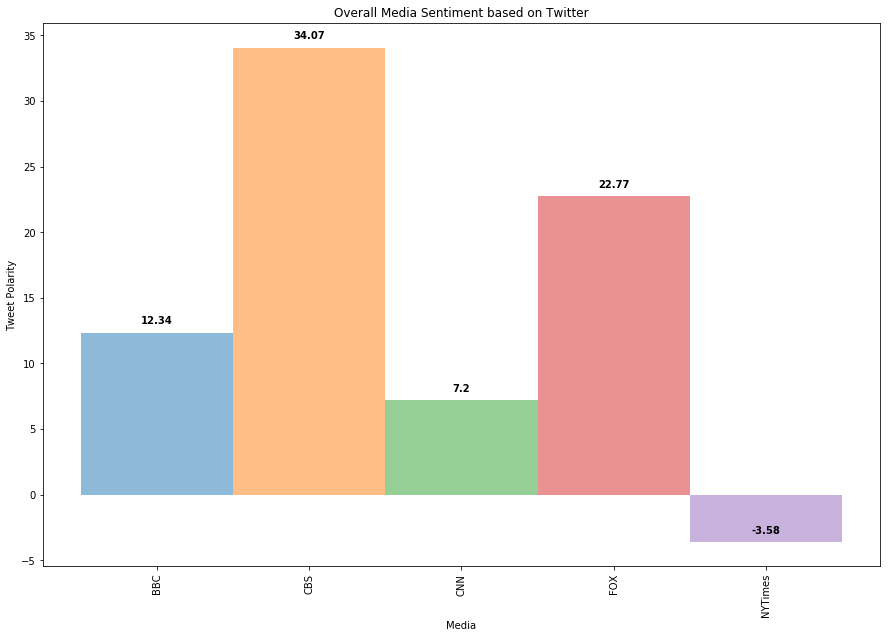

In [5]:
compound_sum = tweet_data.groupby('Media')['Compound'].sum()
plt.figure(figsize= (15,10))
sentiment_chart = compound_sum.plot(kind="bar", width=1, alpha=0.5)

for i, v in enumerate(compound_sum):
    sentiment_chart.text(i, v+.5, round(v,2), color='black', fontweight='bold', ha='center',va='bottom')

plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")
plt.savefig("output_13_1.png")
plt.show()